# YouTube Streamer Analysis

## Introduction

This dataset contains valuable information about the top YouTube streamers. 

## Data

Top 1000 Youtubers statistics

The dataset used for this project contains 9 columns namely:
1. `ranking`: Ranking of the account
2. `username`: Account name of the YouTuber of YouTube website
2. `categories`: Category the content created falls into
3. `subscribers`: Number of subscribers
4. `country`: Country the YouTuber hails from
5. `visits`: Number of views that account has amassed
6. `likes` : Total number of likes on the account
7. `comments`: Total number of comments 
8. `links`: A link to the account

## Task 
Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.



In [51]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.float_format = '{:.0f}'.format # Suppress scientific notation
pd.set_option('display.max_rows', None)
warnings.simplefilter('ignore')

# 1. Data Exploration

- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [52]:
# Read in data
df = pd.read_csv('youtubers_df.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


- The dataset has 1000 observations and 9 columns.
- When it comes to content creation on YouTube, the key metrics are _number of subscibers_, _views count_, _number of likes and comments_

## Data Cleaning
Since the words, in the `Categories` and `Country` columns are in spanish, first convert them to english.

In [53]:
translation_dict = {
    'Música y baile': 'Music and Dance',
    'Videojuegos, Humor': 'Video Games, Humor',
    'Educación': 'Education',
    'Unknown': 'Unknown',
    'Animación, Juguetes': 'Animation, Toys',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Juguetes': 'Toys',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Juguetes': 'Movies, Toys',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Humor': 'Humor',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Entertainment',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Educación, Juguetes': 'Education, Toys',
    'Juguetes, Coches y vehículos': 'Toys, Cars and Vehicles',
    'Música y baile, Juguetes': 'Music and Dance, Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Comida y bebida, Juguetes': 'Food and Drink, Toys',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}

# Function to translate Spanish words to English
def translate_to_english(word):
    return translation_dict.get(word, word)  # Return the translated word if it exists, otherwise return the original word

# Apply the translation function to the 'Category' column
df['Categories'] = df['Categories'].apply(translate_to_english)


In [54]:
spanish_to_english_countries = {
    'India': 'India',
    'Estados Unidos': 'United States',
    'Unknown': 'Unknown',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Filipinas': 'Philippines',
    'Indonesia': 'Indonesia',
    'Tailandia': 'Thailand',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Japón': 'Japan',
    'Ecuador': 'Ecuador',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Arabia Saudita': 'Saudi Arabia',
    'El Salvador': 'El Salvador',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Argelia': 'Algeria',
    'España': 'Spain',
    'Perú': 'Peru',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Somalia': 'Somalia'
}

# Function to translate Spanish words to English
def translate_to_english(word):
    return spanish_to_english_countries.get(word, word)  # Return the translated word if it exists, otherwise return the original word

# Apply the translation function to the 'Category' column
df['Country'] = df['Country'].apply(translate_to_english)

# View the first 5 rows of the now translated dataset
df.head() 

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Music and Dance,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


### Duplicates: Search for duplicates and drop them

In [55]:
# Using the `Links` columns to search for duplicates since each account must have a unique link
df[df.Links.duplicated(keep=False)]

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Toys, Cars and Vehicles",17800000,Unknown,56300,96,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000,United States,797600,50400,179,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000,United States,772800,45000,185,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Toys, Cars and Vehicles",17800000,Unknown,63600,75,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Music and Dance,12100000,Pakistan,62200,810,59,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Movies,12000000,Russia,173600,6600,105,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [56]:
# Drop duplicated columns
df.Links.drop_duplicates(inplace=True)

In [57]:
df[df.Links.duplicated()]


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
250,251,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
450,451,thexoteam,NaN,17900000,United States,772800,45000,185,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Toys, Cars and Vehicles",17800000,Unknown,63600,75,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
952,953,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
953,954,HiTechIslamic,Music and Dance,12100000,Pakistan,62200,810,59,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
956,957,Family-Box,Movies,12000000,Russia,177400,6300,86,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...


In [58]:
df.drop(axis= 0, index= [450,451,956], inplace = True)
df[df.Links.duplicated()]

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
250,251,NickyJamTV,"Music and Dance, Movies",23700000,Colombia,15800,1200,58,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
952,953,Super_Senya_RU,"Animation, Toys",12100000,Unknown,47200,192,0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
953,954,HiTechIslamic,Music and Dance,12100000,Pakistan,62200,810,59,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...


In [59]:
# Reset the index of the data frame
df.reset_index(drop=True, inplace=True,)

### Dealing with Nulls

In [60]:
df.isnull().sum()

Rank            0
Username        0
Categories    305
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [61]:
# Replace empty cells in category with 'Unknown'
df.Categories.fillna(value='Unknown', inplace= True)

In [62]:
df.Categories.value_counts()[:5]

Unknown                    305
Music and Dance            160
Movies, Animation           61
Music and Dance, Movies     41
Daily Vlogs                 37
Name: Categories, dtype: int64

# 2. Trend Analysis

- Is there a correlation between the number of subscribers and the number of likes or comments?
- Identify trends among the top YouTube streamers. Which categories are the most popular?


### Correlation: Check for correlation between variables

<Axes: >

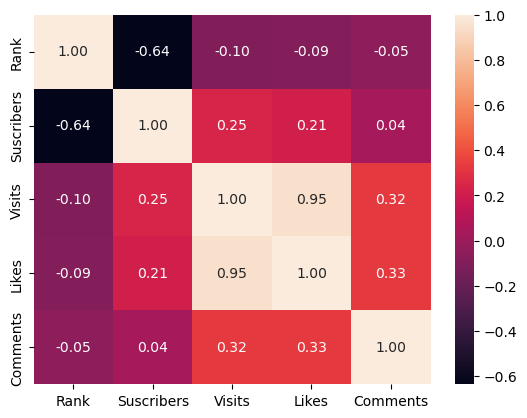

In [63]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

**Observations:**
- Surprisingly, there is neither a correlation between `Subscribers` and `Likes` nor between `Subscribers` and `Comments`
- `Rank` has no correlation with any column, i.e, it provides no useful information. So, it will be dropped from the dataframe
- There is a strong correlation between `Visits` and `Likes`
- There exist a weak linear relationship between `Visits` and `Comments` as well as `Likes` and `Comments`
- There also no correlation between `Comments` and `Subscribers`

In [64]:
# Dropping `Rank` from the dataframe
df.drop(axis=1, columns='Rank', inplace= True)

# Save the cleaned dataset
df.to_csv('youtubers_df_cleaned.csv', index= False)

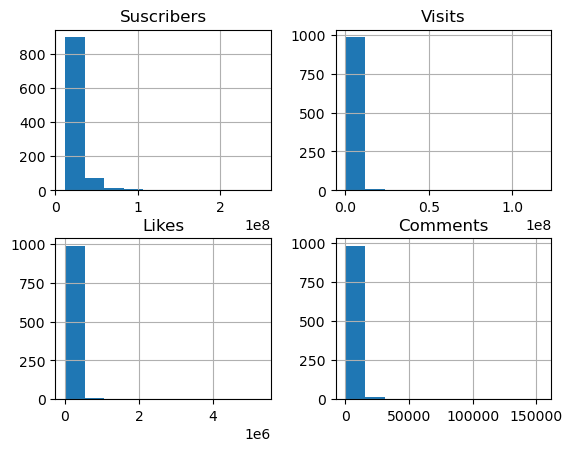

In [65]:
df.hist();

**Observation**

From the histogram, it is obvious that this dataset contains a huge number of outliers. This is understandable because when it comes to content creation, there exists a wide range the count of subscribers, likes, comments can fall into

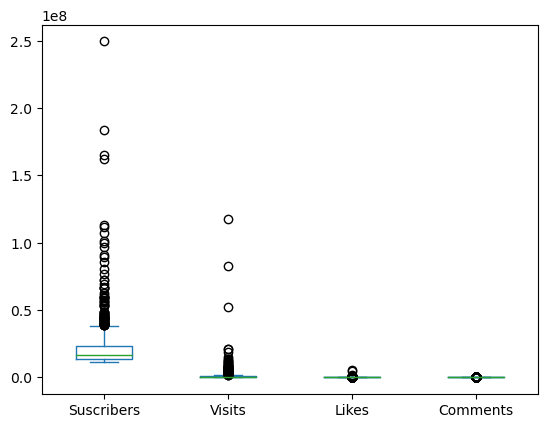

In [66]:
df.plot(kind = 'box');

### Top YouTube streamers. 
To obtain the top YouTube streamers, we investigate the top 25% of the data, ordered by `Visits` (views) column

In [67]:
df_75 = df.copy()

In [68]:
low, high = df['Visits'].quantile([0.75,1])

df_75 = df_75[df['Visits'].between(low, high)]

In [69]:
print(df_75.info())
df_75.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 993
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    250 non-null    object 
 1   Categories  250 non-null    object 
 2   Suscribers  250 non-null    float64
 3   Country     250 non-null    object 
 4   Visits      250 non-null    float64
 5   Likes       250 non-null    float64
 6   Comments    250 non-null    float64
 7   Links       250 non-null    object 
dtypes: float64(4), object(4)
memory usage: 17.6+ KB
None


,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,PewDiePie,"Movies, Video Games",111500000,United States,2400000,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,LikeNastyaofficial,Toys,107500000,Unknown,2600000,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...


In [70]:
# Drop all rows that contain 'Unknown'.
df_75 = df_75[df_75.Categories.str.contains('Unknown') == False]
df_75 = df_75[df_75.Country.str.contains('Unknown') == False]


In [71]:
df_75.groupby(['Username']).sum().sort_values(by = ['Visits'], ascending = False)[:11]

,Suscribers,Visits,Likes,Comments
Username,,,,
MrBeast,183500000,117400000,5300000,18500
MrBeast2,31300000,83100000,5000000,11600
DaFuqBoom,29800000,52700000,1700000,82800
BeastPhilanthropy,16900000,21500000,952100,24000
dojacat,11900000,13600000,395300,73000
NickPro,13200000,12200000,286000,245
StokesTwins,22700000,11700000,235000,10000
triggeredinsaan,20400000,11100000,1400000,38000
A4a4a4a4,47300000,9700000,330400,22000


These are the top 10 YouTubers by number of views/streams (visits).
1. MrBeast
2. DaFuqBoom
3. BeastPhilanthropy
4. dojacat
5. NickPro
6. StokesTwins
7. triggeredinsaan
8. A4a4a4a4
9. Sidemen
10. GoAmiGo

Next, we determine the most popular categories by likes, visits and subscribers amongst the top 25% of YouTube streamers

In [72]:
df_75.groupby(['Country','Categories']).sum().sort_values(by = ['Visits'], ascending = False)

Suscribers    Visits   Likes  \
Country        Categories                                                     
United States  Video Games, Humor               422700000 158984800 6415400   
               Daily Vlogs                       74400000  85800000 5106500   
               Animation, Humor                 209800000  74500000 2545800   
               Food and Drink                    62600000  29400000 1410000   
               Music and Dance                  178500000  25400000 1011700   
               Animation, Video Games           198300000  23300000 1528700   
India          Daily Vlogs                      124400000  20400000 1065100   
United States  Sports                            25800000  13600000  338300   
Russia         Video Games                      115200000  11500000  605300   
United States  Movies                            45400000  11300000  414400   
India          Humor                             20400000  11100000 1400000   
Mexico         Animation, Humor                  55100000  10900000  601500   
United States  Video Games                       91400000  10500000  294400   
               Movies, Humor                     52500000   9900000  520500   
               Science and Technology            67100000   9800000  695700   
Russia         Animation, Humor                  47300000   9700000  330400   
United Kingdom Video Games, Humor                19500000   9200000  284800   
Colombia       Daily Vlogs                       15400000   7900000  455300   
United States  Music and Dance, Humor            17400000   7900000   98500   
Mexico         Movies, Animation                153600000   7500000  508500   
India          Movies, Animation                 12400000   7400000  343000   
               Education                         21700000   7300000  501700   
               News and Politics                 12900000   6400000  328000   
Argentina      Animation                         25700000   5700000  208400   
               Movies, Humor                     18800000   5600000  401700   
India          Music and Dance                  138500000   5562500  405000   
France         Daily Vlogs                       39100000   5300000   57300   
Mexico         Music and Dance                   42100000   5300000  271300   
Russia         Video Games, Humor                17400000   5100000  390700   
United States  Education                         21100000   4900000  253500   
Philippines    Movies, Humor                     30200000   4800000  145700   
United States  Humor                             21900000   4700000   67000   
Mexico         Music and Dance, Movies           49700000   4400000  171600   
Colombia       Animation, Humor                  22900000   4300000  294400   
United States  Animals and Pets                  16600000   4000000  193200   
               Movies, Animation                 47300000   3709100  146900   
India          Music and Dance, Humor            29700000   3600000  106500   
Russia         Animation, Video Games            18600000   3600000  328100   
India          Movies, Humor                     30700000   3565100   61600   
Iraq           Animation, Video Games            32700000   3300000  382000   
Indonesia      Music and Dance, Movies           16000000   3300000   62400   
Brazil         Music and Dance                   27900000   3200000   69100   
Russia         Music and Dance, Movies           11900000   3100000  189900   
United States  Music and Dance, Animation        21100000   2800000  127300   
Philippines    Humor                             13800000   2800000   94000   
United States  Design/Art, Beauty                14400000   2700000  152400   
Russia         Music and Dance, Humor            13700000   2600000   58300   
United States  Design/Art, DIY and Life Hacks    25700000   2600000  127300   
               Movies, Video Games              111500000   2400000  197300   
Russia         DIY

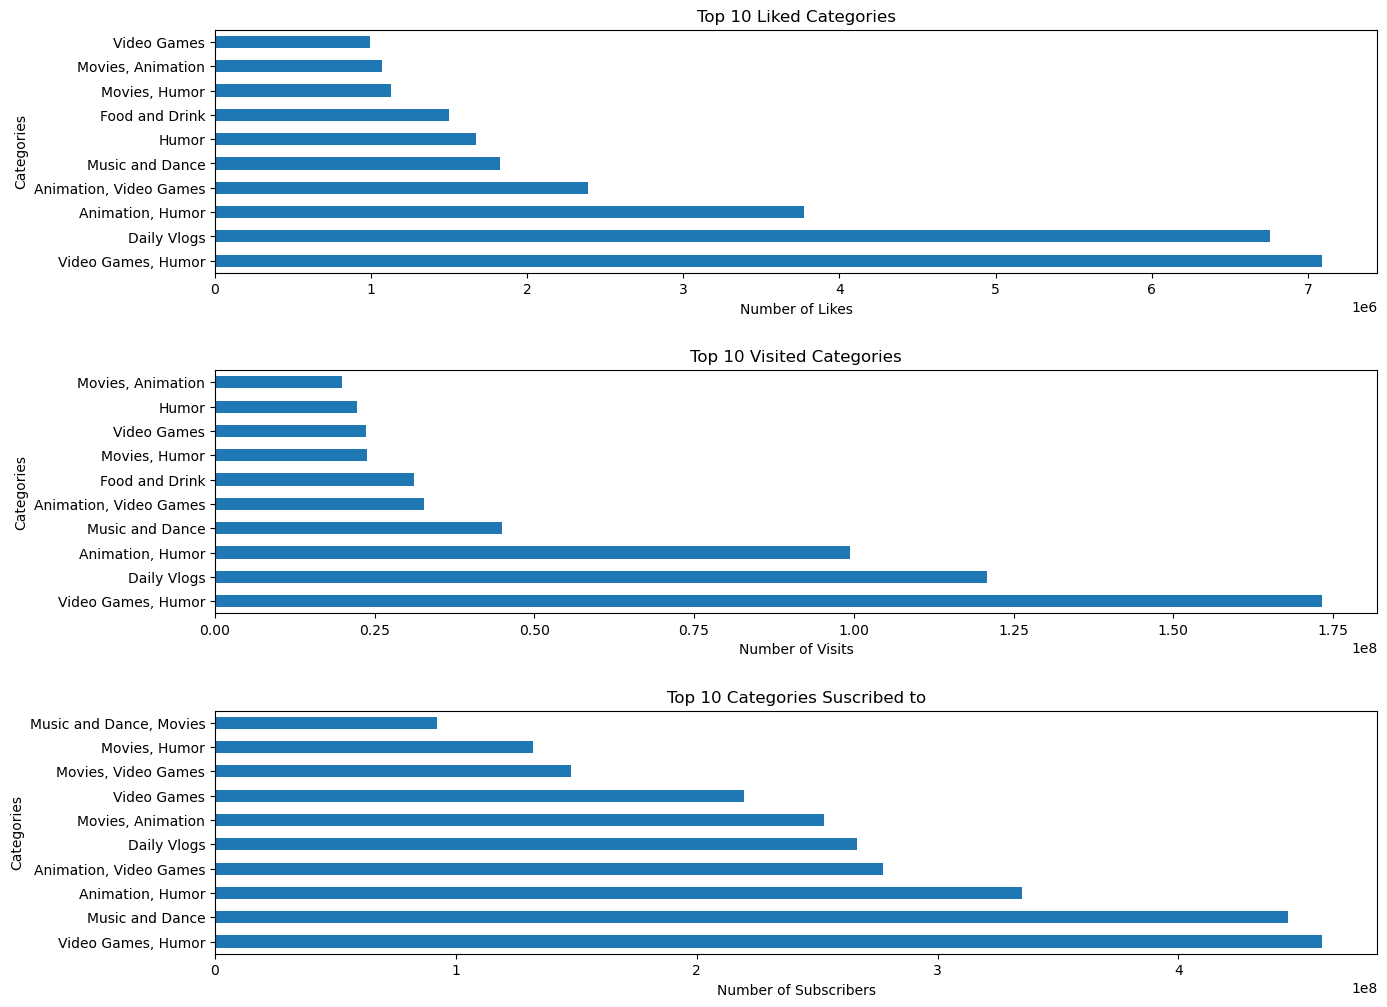

In [73]:
fig, axs = plt.subplots(figsize = (15,12), nrows = 3,ncols=1)
plt.subplots_adjust(hspace= 0.4)
df_75.groupby('Categories')['Likes'].sum().sort_values(ascending = False)[:10].plot(kind = 'barh', ax = axs[0])
axs[0].set_title('Top 10 Liked Categories')
axs[0].set_xlabel('Number of Likes')

df_75.groupby('Categories')['Visits'].sum().sort_values(ascending = False)[:10].plot(kind = 'barh', ax = axs[1])
axs[1].set_title('Top 10 Visited Categories')
axs[1].set_xlabel('Number of Visits')

df_75.groupby('Categories')['Suscribers'].sum().sort_values(ascending = False)[:10].plot(kind = 'barh', ax = axs[2])
axs[2].set_title('Top 10 Categories Suscribed to')
axs[2].set_xlabel('Number of Subscribers');



The most popular categories are:
- Video games

- Daily Vlogs
- Animation (Humour)
- Music and Dance
- Animation (Video Games)
- Food and Drinks
- Movies (Humour)
- Movies (Animation)- 


# 3. Audience Study

- Analyze the distribution of streamers' audiences by country. Are there regional preferences for
specific content categories?

___NOTE: The column `country` represents the country of origin of the YouTuber___


In [74]:
# Drop all rows that contain 'Unknown'.
df_temp = df.copy()
df_temp = df_temp[df_temp.Categories.str.contains('Unknown') == False]
df_temp = df_temp[df_temp.Country.str.contains('Unknown') == False]

df_temp.groupby(['Country', 'Categories']).sum().sort_values(by = 'Visits', ascending = False).head(20)

Suscribers    Visits   Likes  Comments
Country        Categories                                                    
United States  Video Games, Humor       437300000 159509700 6450500     62612
               Daily Vlogs              139000000  86443400 5126400     16493
               Animation, Humor         334000000  75702600 2584706     98981
               Music and Dance         1425800000  31250600 1439257    119551
               Food and Drink           148400000  30352400 1449177     35200
               Animation, Video Games   393200000  27045700 1625202     99254
India          Daily Vlogs              216400000  21498500 1085981     14763
United States  Sports                   124200000  14076200  359592      1092
               Movies, Humor            161300000  12489600  607462     10891
Russia         Video Games              139100000  12324200  624600     22600
United States  Video Games              302100000  11683000  335100      8547
               Movies                    83200000  11565800  421800     20753
India          Humor                     47500000  11272700 1402700     38173
Mexico         Animation, Humor          55100000  10900000  601500     17827
United States  Science and Technology   139300000  10796500  743300     17628
Russia         Animation, Humor          47300000   9700000  330400     22000
United Kingdom Video Games, Humor        19500000   9200000  284800      8200
India          Education                159200000   8814900  661967     20522
Colombia       Daily Vlogs               29000000   8619100  514300      2472
Mexico         Movies, Animation        280400000   8561400  573846     10134

__Observations__:
- For USA YouTubers, video games and humor channels rack up the highest number of visits, followed by daily vlogs, animations and food & drinks channels.
- For Indian YouTubers, daily vlog channels and humor are the top two most visited categories.
- For countries like Russia and UK, similar themes of the video games category show up as the most visited categories.

# 4. Performance Metrics

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?


In [75]:
df.mean()

Suscribers   21912437
Visits        1212069
Likes           53742
Comments         1292
dtype: float64

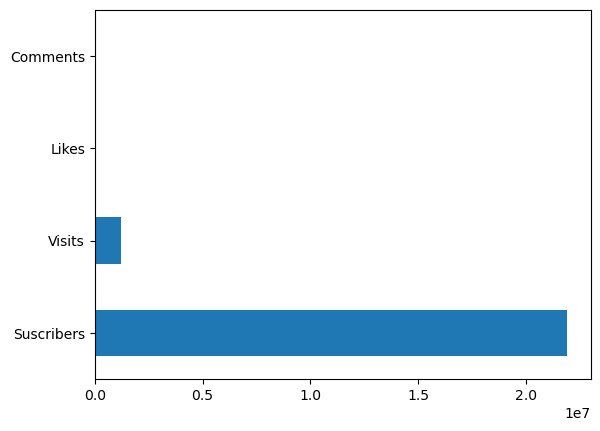

In [76]:
df.mean().plot(kind = 'barh');


Yes, there are anormalies. It is unusual for the number of subscribers to supersede the the number of likes and visitors

# 5. Content Categories

- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

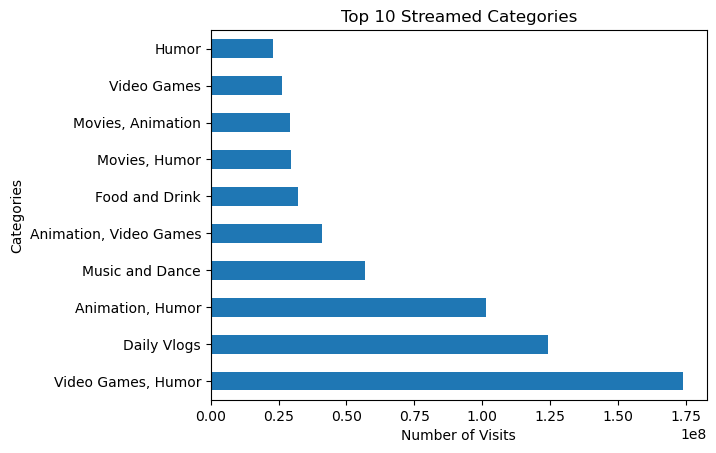

In [77]:
df_temp.groupby('Categories')['Visits'].sum().sort_values(ascending = False)[:10].plot(kind = 'barh')
plt.title('Top 10 Streamed Categories')
plt.xlabel('Number of Visits');

In [78]:
df_temp_2 = df_temp.groupby('Categories').sum()

In [79]:
# Obtain top 1% across all metrics
df_temp.quantile(0.99)

Suscribers   87996000
Visits       11920000
Likes          537296
Comments        22880
Name: 0.99, dtype: float64

In [80]:
# Obtain the average value across all metrics
sub_99, visits_99, likes_99, comments_99 = df_temp.quantile(0.99).values

# Round each average to the nearest whole number
sub_99 = round(sub_99)
visits_99 = round(visits_99)
likes_99 = round(likes_99)
comments_99= round(comments_99)

In [81]:
mask_sub = df_temp_2['Suscribers'] > sub_99
mask_visits = df_temp_2['Visits'] > visits_99
mask_likes = df_temp_2['Likes'] > likes_99
mask_comments = df_temp_2['Comments'] > comments_99

In [82]:
df_top_categories = df_temp_2[mask_sub & mask_visits & mask_likes & mask_comments]
df_top_categories.sort_values(by= 'Visits', ascending=False)

,Suscribers,Visits,Likes,Comments
Categories,,,,
"Video Games, Humor",489000000,174074500,7148700,82060
Daily Vlogs,535100000,124394700,6916130,36252
"Animation, Humor",498700000,101344000,3932460,144040
Music and Dance,3836500000,56720000,2752369,319554
"Animation, Video Games",659400000,40802000,2695997,128745
Food and Drink,177200000,32184800,1542077,36641
"Movies, Humor",509100000,29574300,1347527,34082
"Movies, Animation",1159300000,29210200,1535496,39190
Video Games,474700000,26355600,1085300,33443


The Categories with exceptional performance are:

- Video Games
- Daily Vlogs
- Animation
- Food and Drink
- Movies
- Education

# 6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns

__Data on brand collaboration and marketing campaigns was not provided.__

# 7. Benchmarking: 

- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [83]:
# Obtain the average value across all metrics
sub_avg, visits_avg, likes_avg, comments_avg = df.mean().values

# Round each average to the nearest whole number
sub_avg = round(sub_avg)
visits_avg = round(visits_avg)
likes_avg = round(likes_avg)
comments_avg = round(comments_avg)

In [84]:
mask_sub = df['Suscribers'] > sub_avg
mask_visits = df['Visits'] > visits_avg
mask_likes = df['Likes'] > likes_avg
mask_comments = df['Comments'] > comments_avg

df_above_avg = df[mask_sub & mask_visits & mask_likes & mask_comments]


In [85]:
print(df_above_avg.info())
df_above_avg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 288
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    36 non-null     object 
 1   Categories  36 non-null     object 
 2   Suscribers  36 non-null     float64
 3   Country     36 non-null     object 
 4   Visits      36 non-null     float64
 5   Likes       36 non-null     float64
 6   Comments    36 non-null     float64
 7   Links       36 non-null     object 
dtypes: float64(4), object(4)
memory usage: 2.5+ KB
None


,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,PewDiePie,"Movies, Video Games",111500000,United States,2400000,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,dudeperfect,Video Games,59700000,United States,5300000,156500,4200,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,TaylorSwift,Music and Dance,54100000,United States,4300000,300400,15000,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,JuegaGerman,"Movies, Animation",48600000,Mexico,2000000,117100,3000,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...


Of the 994 YouTubers considered in this dataset, only 36 of them display above-average performance across all metrics

In [86]:
df_above_avg.describe()

,Suscribers,Visits,Likes,Comments
count,36,36,36,36
mean,38788889,11283333,544547,11381
std,29610344,23959090,1167327,15764
min,22500000,1300000,59800,1300
25%,25350000,2175000,127100,2825
50%,30850000,3850000,221700,5500
75%,39975000,6425000,333250,15250
max,183500000,117400000,5300000,82800


In [87]:
df_above_avg.groupby('Country').sum().sort_values(by = 'Likes', ascending = False)

,Suscribers,Visits,Likes,Comments
Country,,,,
United States,796400000,312000000,14886500,253800
India,177500000,45500000,2076500,70800
Mexico,254300000,24400000,1352000,47100
Iraq,32700000,3300000,382000,11400
Russia,47300000,9700000,330400,22000
Colombia,22900000,4300000,294400,1300
Argentina,25700000,5700000,208400,1700
Indonesia,39600000,1300000,73500,1600


**Observations**

Across all metrics, YouTubers in the USA have the best performace, followed by India and Mexico.

In [88]:
df_above_avg.groupby('Username').sum().sort_values(by = 'Likes', ascending = False)


,Suscribers,Visits,Likes,Comments
Username,,,,
MrBeast,183500000,117400000,5300000,18500
MrBeast2,31300000,83100000,5000000,11600
DaFuqBoom,29800000,52700000,1700000,82800
MRINDIANHACKER,32600000,6500000,617400,26000
alanbecker,24300000,7600000,582600,5900
fedevigevani,32000000,7700000,412200,17000
souravjoshivlogs7028,22700000,5600000,382300,8900
AboFlah,32700000,3300000,382000,11400
TechnoGamerzOfficial,35600000,6200000,341800,16500


__Across all metrics__, these are the __top 10__ performing YouTubers:

1. MrBeast
2. DaFuqBoom
3. MRINDIANHACKER
4. alanbecker
5. fedevigevani
6. souravjoshivlogs7028
7. AboFlah
8. TechnoGamerzOfficial
9. A4a4a4a4
10. VillageCookingChannel

# 8. Content Recommendation
- Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics.


In [89]:
# Import libraries to be used
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
# Read in cleaned dataset
df_clean = pd.read_csv('youtubers_df_cleaned.csv')
df_clean = df_clean.reset_index()


In [91]:
# Combine important columns. Recommendations will be given based on the similarity between country and category
def combine_features(data):
    features = []
    for i in range(0, data.shape[0]):
        features.append(data["Categories"][i] + " " + data["Country"][i])
    return features
    

In [92]:
# Add merged columns to the dataframe
df_clean["combined_features"] = combine_features(df_clean)


In [93]:
# Convert text in the new column to a matrix of word counts
cm = CountVectorizer().fit_transform(df_clean["combined_features"])

# Get the cosine similarity matrix from the count matrix
cs = cosine_similarity(cm)


In [94]:
# recommend similar accounts
def recommend(df, account):
    recommendations = []
    # Find the index of the YouTuber the user likes
    ytuber_id = df[df.Username == account]["index"].values[0]

    # Create a list of tuples in the form (username, similarity score)
    scores = list(enumerate(cs[ytuber_id]))

    # Sort the list of similar books in descending order
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    sorted_scores = sorted_scores[1:]

    # Exclude the account the user picked from the list of similar accounts
    for i in sorted_scores:
        if i[0] == ytuber_id:
            print(i)
            sorted_scores.remove(i)
    
    # Create a loop to print the first 5 most similar accounts
    print(f"The 5 most similar accounts to '{account}' are:\n ")
    
    j = 0
    for item in sorted_scores:
        accounts = df[df['index'] == item[0]]["Username"].values[0]
        recommendations.append(accounts)
        j = j+1
        if j >= 5:
            break

    return recommendations

In [95]:
# Recommend accounts that are similar to this user
df_clean.Username[1]

'MrBeast'

In [96]:
for count, account in enumerate(recommend(df_clean, df_clean.Username[1])):
    print(str(count+1) + '. ' + account)

The 5 most similar accounts to 'MrBeast' are:
 
1. brentrivera
2. PrestonYT
3. rug
4. StokesTwins
5. BenAzelart
